In [1]:
import numpy as np
import pandas as pd
import os
from toolbox.utils import import_saws_data
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../database/giyani/weather/'
files = os.listdir(path)

temp = pd.DataFrame()
hum = pd.DataFrame()
pres = pd.DataFrame()
windspeed = pd.DataFrame()
rain = pd.DataFrame()
winddir = pd.DataFrame()

for file in files:
    if file.endswith('_temp.csv'):
        temp = pd.concat([temp, import_saws_data(path + file)])
    elif file.endswith('_hum.csv'):
        hum = pd.concat([hum, import_saws_data(path + file)])
    elif file.endswith('_pressure.csv'):
        pres = pd.concat([pres, import_saws_data(path + file)])
    elif file.endswith('_windspeed.csv'):
        windspeed = pd.concat([windspeed, import_saws_data(path + file)])
    elif file.endswith('_rain.csv'):
        rain = pd.concat([rain, import_saws_data(path + file)])
    elif file.endswith('_winddir.csv'):
        winddir = pd.concat([winddir, import_saws_data(path + file)])
    elif file.endswith('.csv'):
        print('{} is not a valid file'.format(file))

# Concatenate all dataframes
df = pd.concat([temp, hum, pres, rain, winddir, windspeed], axis=1)
df.columns = ['Outdoor Dry Bulb Temperature', 'Outdoor Relative Humidity', 'Atmospheric Station Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed']

all_weather.csv is not a valid file


In [3]:
#%% Clean Data

df = df.loc['2016-09-04 00:00:00':'2017-09-14 23:00:00']

df = df.replace('     -', np.nan)
df = df.replace('      -', np.nan)

df['Outdoor Dry Bulb Temperature'] = df['Outdoor Dry Bulb Temperature'].astype(float)
df['Outdoor Relative Humidity'] = df['Outdoor Relative Humidity'].astype(float)

df['Precipitable Water'] = df['Precipitable Water'].fillna(0)
df['Precipitable Water'] = df['Precipitable Water'].replace('      ', 0)
df['Precipitable Water'] = df['Precipitable Water'].astype(float)

df['Wind Speed'] = df['Wind Speed'].fillna(0)
print(df.isnull().sum())
df['Atmospheric Station Pressure'] = df['Atmospheric Station Pressure'].fillna(method='ffill')
df['Atmospheric Station Pressure'] = df['Atmospheric Station Pressure'].astype(float)

df['Wind Speed'] = df['Wind Speed'].replace('     -', np.nan)
df['Wind Speed'] = df['Wind Speed'].fillna(method='ffill')
df['Wind Speed'] = df['Wind Speed'].astype(float)

df['Wind Direction'] = df['Wind Direction'].replace(np.nan, 0)
df['Wind Direction'] = df['Wind Direction'].replace('     -', 0)
df['Wind Direction'] = df['Wind Direction'].astype(int)

df['Datetime'] = df.index
df['Datetime'] = pd.to_datetime(df['Datetime'])
print(df.isnull().sum())
df.dropna(inplace=True)

Outdoor Dry Bulb Temperature    133
Outdoor Relative Humidity       133
Atmospheric Station Pressure    146
Precipitable Water                0
Wind Direction                  136
Wind Speed                        0
dtype: int64
Outdoor Dry Bulb Temperature    133
Outdoor Relative Humidity       133
Atmospheric Station Pressure      0
Precipitable Water                0
Wind Direction                    0
Wind Speed                        0
Datetime                          0
dtype: int64


In [4]:
#%% Check data for missing values and types
print('The dataframe contain missing values:\n{}'.format(df.isnull().sum()))
print('The type of the data is:\n{}'.format(df.dtypes))

The dataframe contain missing values:
Outdoor Dry Bulb Temperature    0
Outdoor Relative Humidity       0
Atmospheric Station Pressure    0
Precipitable Water              0
Wind Direction                  0
Wind Speed                      0
Datetime                        0
dtype: int64
The type of the data is:
Outdoor Dry Bulb Temperature           float64
Outdoor Relative Humidity              float64
Atmospheric Station Pressure           float64
Precipitable Water                     float64
Wind Direction                           int32
Wind Speed                             float64
Datetime                        datetime64[ns]
dtype: object


In [5]:
df

,Outdoor Dry Bulb Temperature,Outdoor Relative Humidity,Atmospheric Station Pressure,Precipitable Water,Wind Direction,Wind Speed,Datetime
2016-09-04 00:00:00,17.6,46.0,966.7,0.0,0,0.0,2016-09-04 00:00:00
2016-09-04 01:00:00,16.7,48.0,967.1,0.0,0,0.0,2016-09-04 01:00:00
2016-09-04 02:00:00,14.9,50.0,966.7,0.0,0,0.0,2016-09-04 02:00:00
2016-09-04 03:00:00,13.4,55.0,966.6,0.0,0,0.0,2016-09-04 03:00:00
2016-09-04 04:00:00,13.3,55.0,966.6,0.0,0,0.0,2016-09-04 04:00:00
...,...,...,...,...,...,...,...
2017-09-14 19:00:00,27.5,23.0,964.6,0.0,80,1.8,2017-09-14 19:00:00
2017-09-14 20:00:00,25.5,30.0,965.7,0.0,80,1.5,2017-09-14 20:00:00
2017-09-14 21:00:00,24.5,57.0,966.8,0.0,90,3.2,2017-09-14 21:00:00
2017-09-14 22:00:00,22.0,67.0,968.0,0.0,90,4.6,2017-09-14 22:00:00


In [6]:
#%% Export data
df.to_csv('../database/cleaned/giyani_weather.csv')

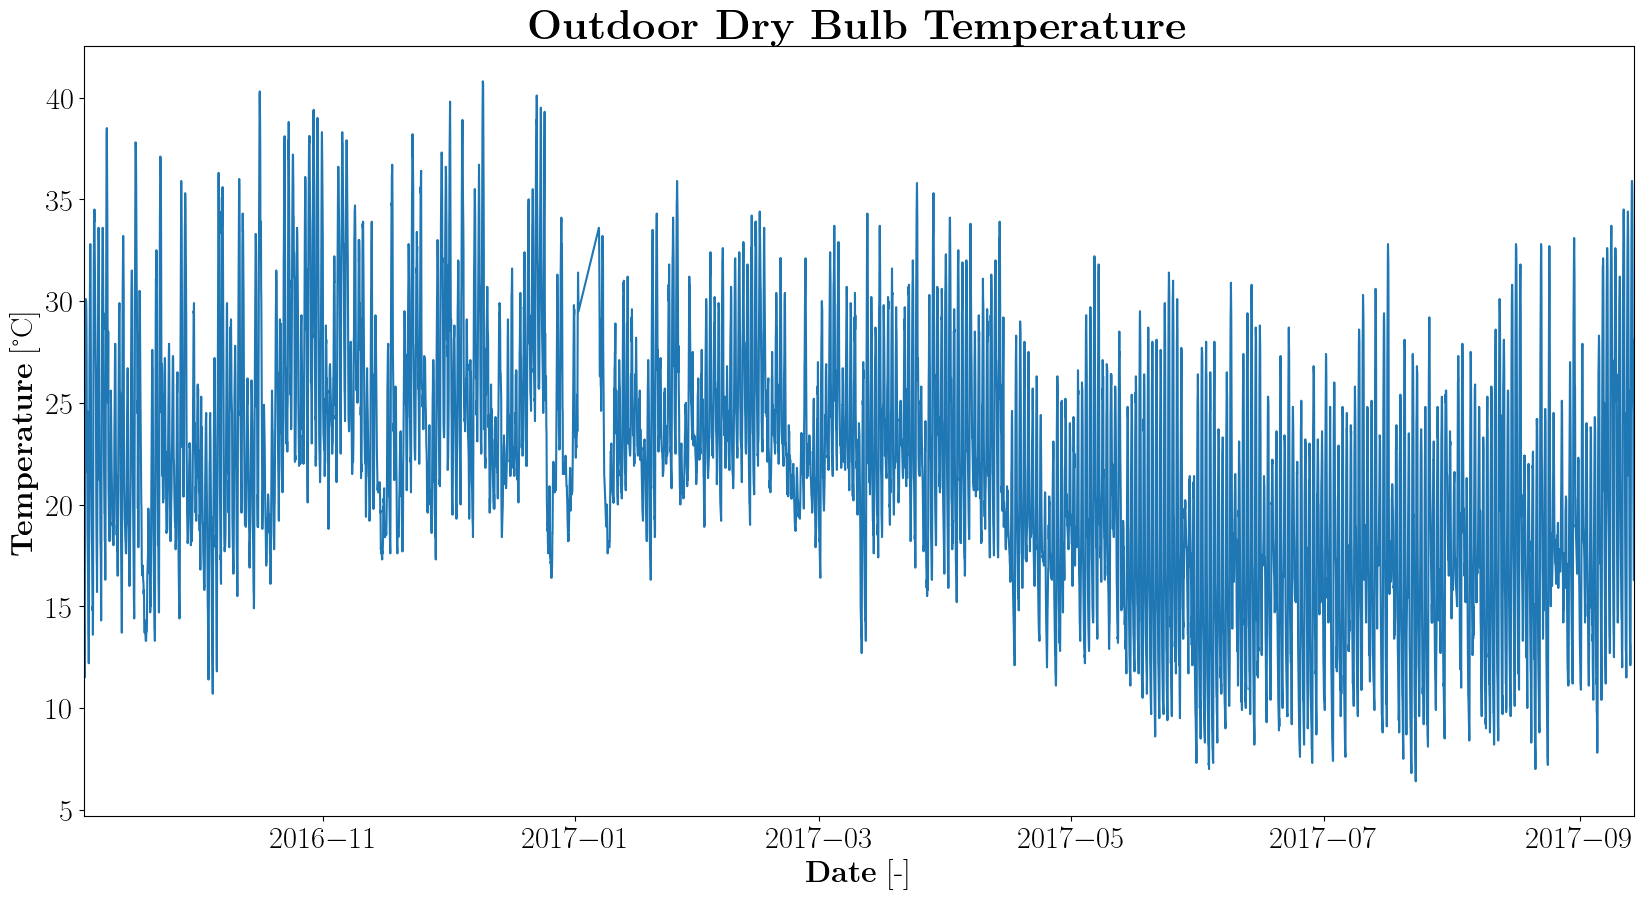

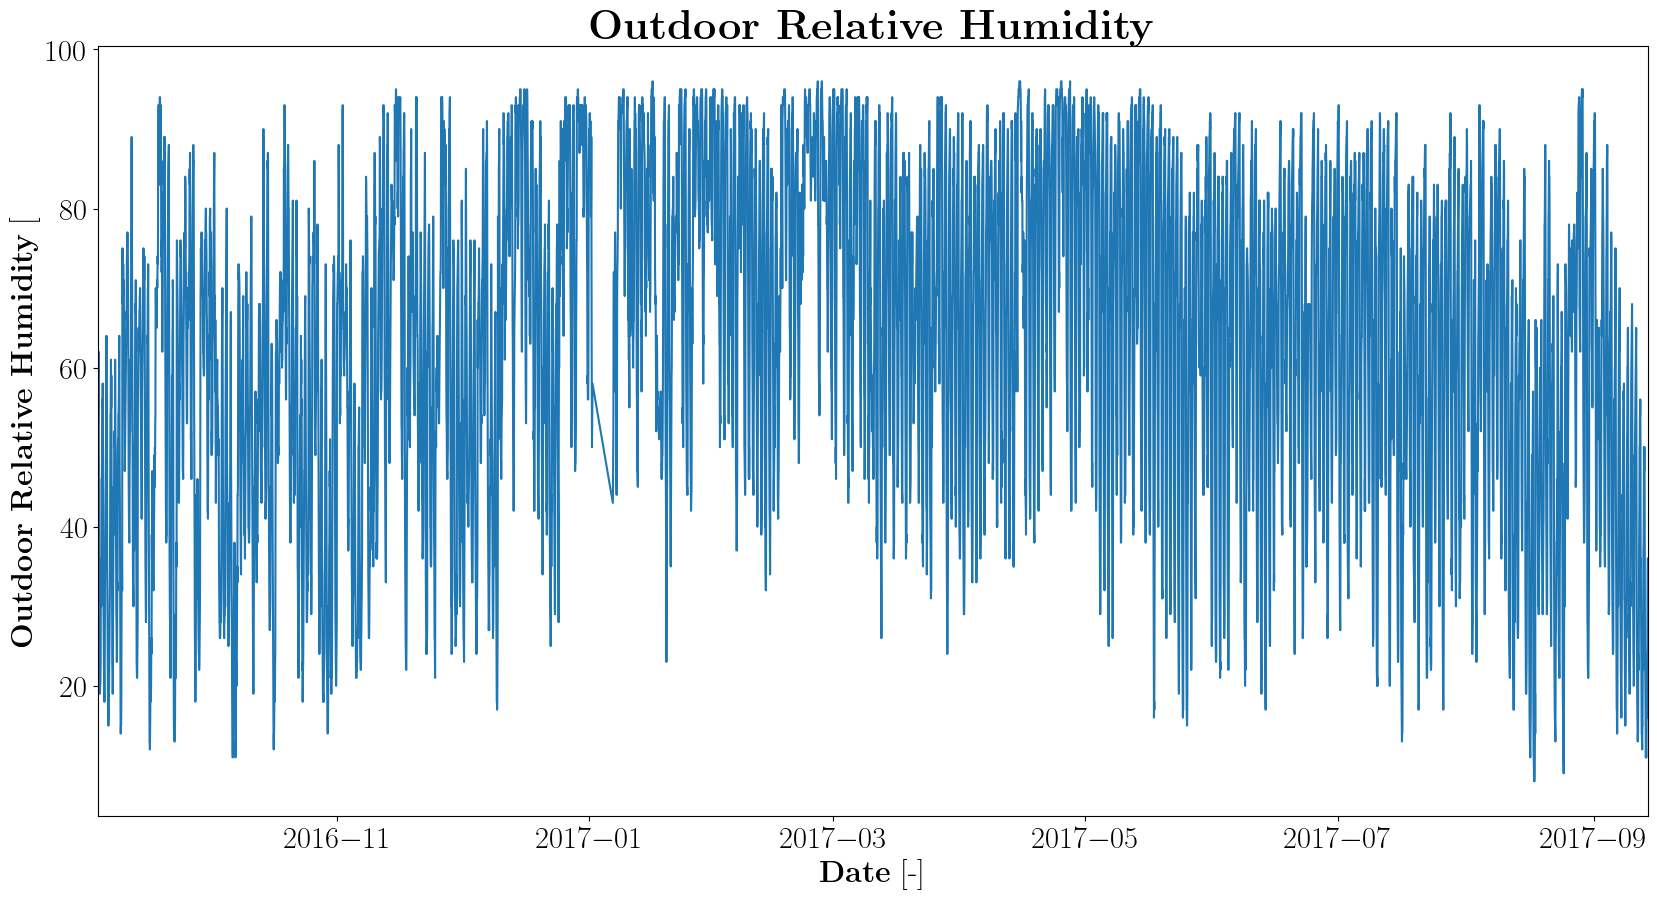

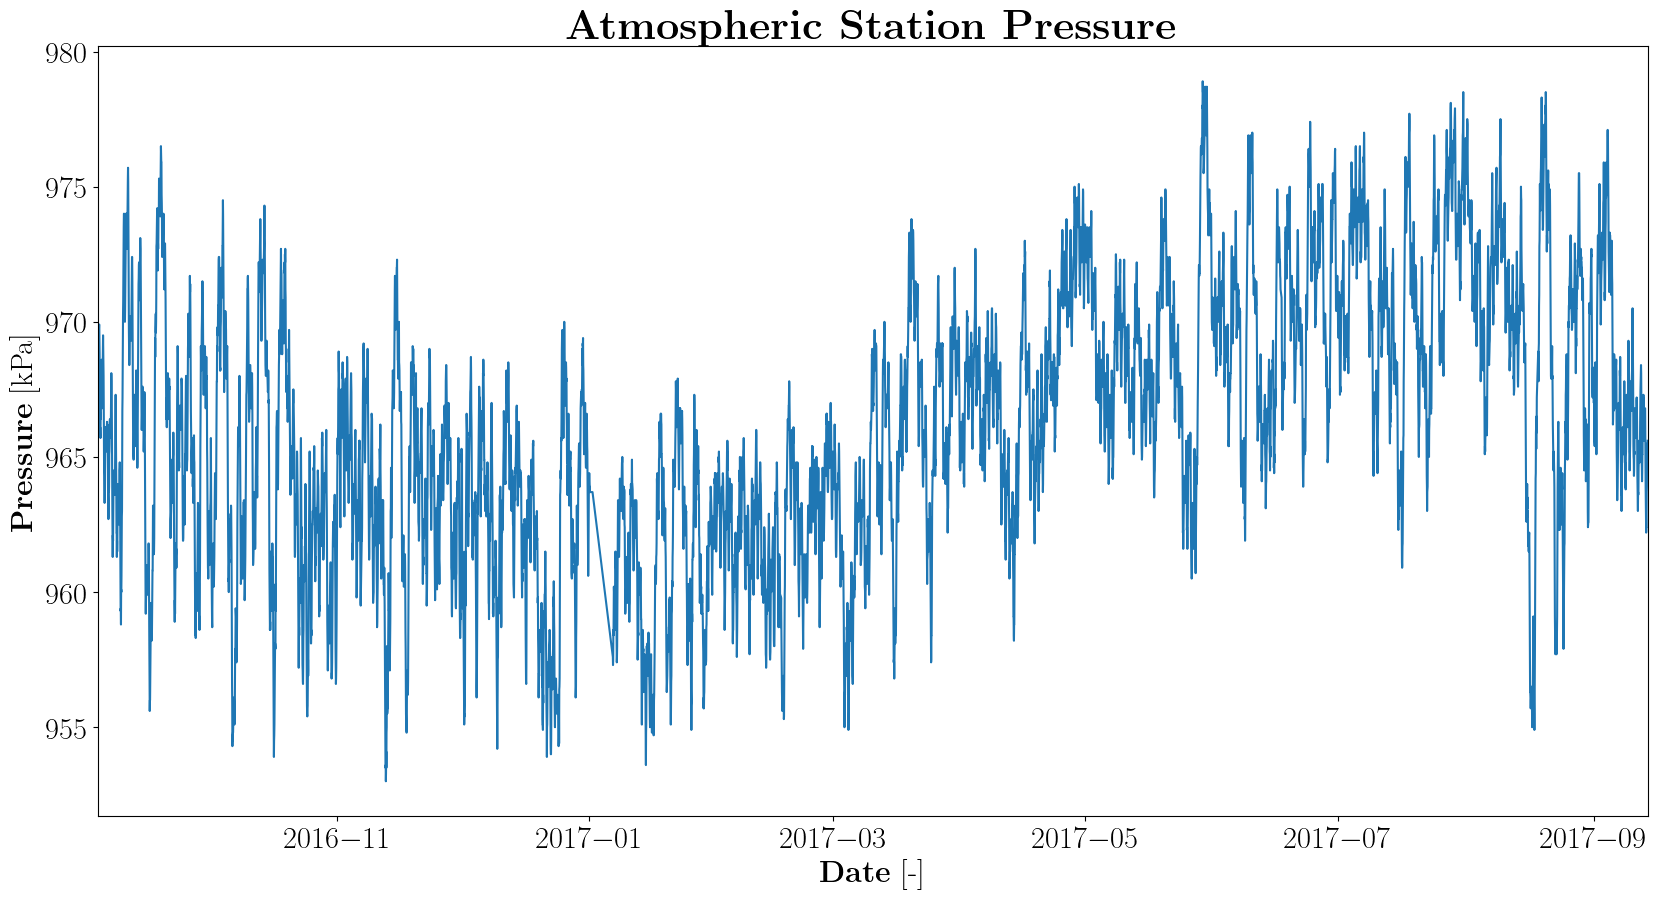

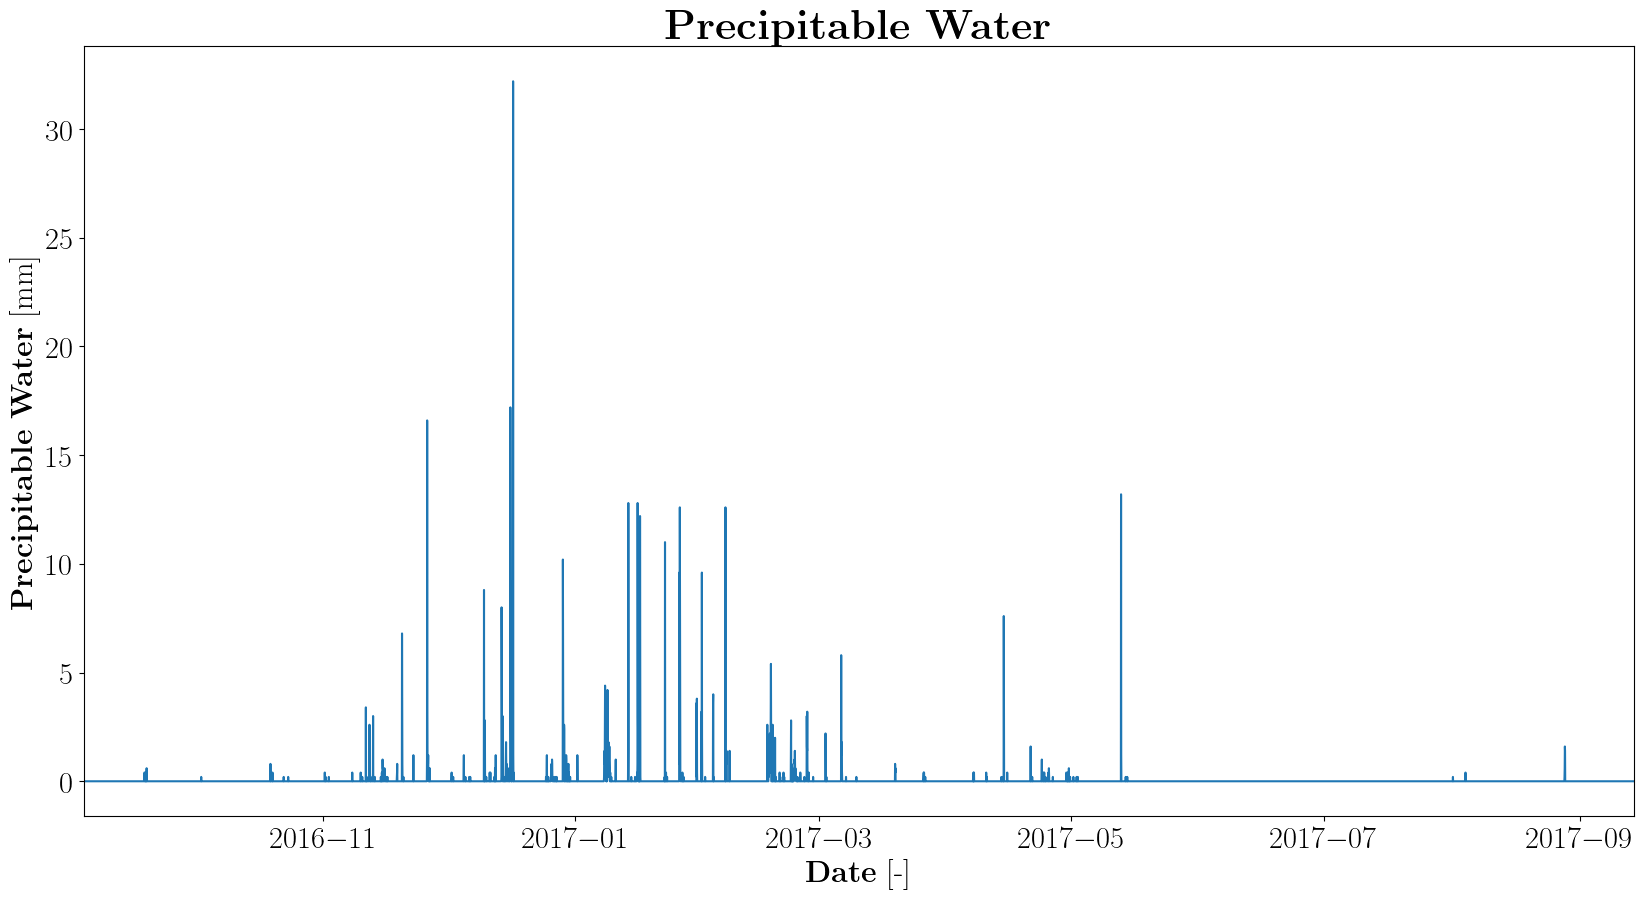

In [7]:
#%% Figures
import matplotlib.pyplot as plt
import seaborn as sns
from toolbox.figures import figure_params, figure_save

# Plot the dry bulb temperature
plt =  figure_params(
    title='Outdoor Dry Bulb Temperature',
    xlabel='Date',
    ylabel='Temperature',
    x_units= '-',
    y_units= '°C',
)
plt.plot(df.index, df['Outdoor Dry Bulb Temperature'], label='Outdoor Dry Bulb Temperature')
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2017-09-14'))
plt.show()

# Plot the relative humidity
plt =  figure_params(
    title='Outdoor Relative Humidity',
    xlabel='Date',
    ylabel='Outdoor Relative Humidity',
    x_units= '-',
    y_units= '%',
)
plt.plot(df.index, df['Outdoor Relative Humidity'], label='Outdoor Relative Humidity')
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2017-09-14'))
plt.show()

# Plot the atmospheric station pressure
plt =  figure_params(
    title='Atmospheric Station Pressure',
    xlabel='Date',
    ylabel='Pressure',
    x_units= '-',
    y_units= 'kPa',
)
plt.plot(df.index, df['Atmospheric Station Pressure'], label='Atmospheric Station Pressure')
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2017-09-14'))
plt.show()

# Plot the precipitable water
plt =  figure_params(
    title='Precipitable Water',
    xlabel='Date',
    ylabel='Precipitable Water',
    x_units= '-',
    y_units= 'mm',
)
plt.plot(df.index, df['Precipitable Water'], label='Precipitable Water')
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2017-09-14'))
plt.show()

import plotly.express as px

# fig = px.bar_polar(df[['Wind Direction', 'Wind Speed']], r="Wind Speed", theta="Wind Direction",
#                     template=,
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)

# fig.show()